This script measures the performance of new GETELEC in comparison to the old one


In [13]:
import os
import sys
import numpy as np

srcPath = os.getcwd() + "/../src"
oldPath = os.getcwd() + "/../oldGETELEC/python"
sys.path.append(srcPath)
sys.path.append(oldPath)

from getelecModel import GETELECModel as GTM
import getelec_mod as oldGT


Let's create some simple data and the needed objects

In [14]:
gtm = GTM()
Npoints = 20000
field = np.linspace(2., 10., Npoints)
currentDensityOld = np.copy(field)
nottinghamHeatOld = np.copy(field)
workFunction = 4.5
gamma = 10.
temperature = 300.

gtm.setParameters(field = field, radius = 10., workFunction = workFunction, gamma = gamma, emitterType = "metal", temperature = temperature)

oldEmitter = oldGT.emission_create(approx=2, gamma=gamma, Temp=temperature, W=workFunction, R=10.)

Running with the old Code:

In [15]:
for i in range(Npoints):
    oldEmitter.F = field[i]
    oldEmitter.cur_dens()
    currentDensityOld[i] = oldEmitter.Jem
    nottinghamHeatOld[i] = oldEmitter.heat

Running with the new GETELEC code

In [16]:
gtm.run(calculateCurrent=True, calculateNottinghamHeat=True, calculateSpectrum=False)

Compare the data

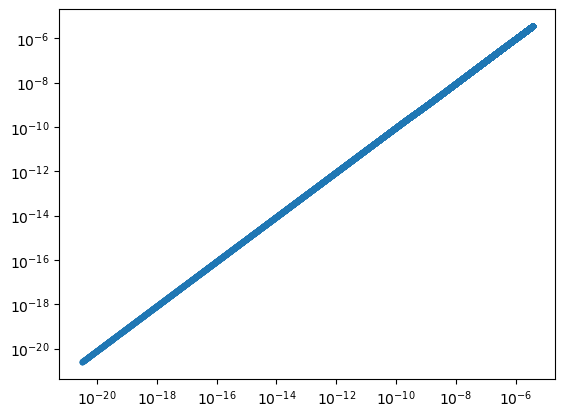

The average error between the calculations is -0.04307696110588598
[ 0.99469627 -0.06752817]


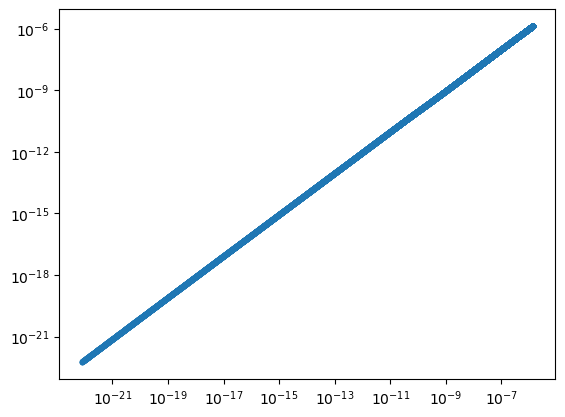

The average error between the calculations is -0.05289643638312176


In [17]:
import matplotlib.pyplot as plt

currentDensityNew = gtm.getCurrentDensity()
plt.loglog(currentDensityOld, currentDensityNew, '.')
plt.show()

print("The average error between the calculations is", np.mean(np.log(currentDensityNew / currentDensityOld)))

print(np.polyfit(np.log(currentDensityNew), np.log(currentDensityOld), 1))

nottinghamHEatNew = gtm.getNottinghamHeat()
plt.loglog(nottinghamHeatOld, nottinghamHEatNew, '.')
plt.show()

print("The average error between the calculations is", np.mean(np.log(np.abs(nottinghamHEatNew / nottinghamHeatOld))))